Origem dos dados: https://www.kaggle.com/mssmartypants/water-quality/version/3

Amostras sobre qualidade da água e se é segura ou não.

# 1. Entendimento do negócio

Uma empresa de fornecimento de água retira amostras de água de vários bairros para saber se a água está segura ou não para consumo humano. Para isso realiza são feitos testes em laboratório para obter diversos dados da amostra como quantidade de alumínio, amônia, bactérias, entre outros. Com o resultado dos testes um profissional analisa e avalia a água como segura ou não.

**Problema**: O tempo necessário para a análise leva alguns dias devido ao número de profissionais que realizam a análise. A agência reguladora realiza análises de forma independente e em caso de não aviso de água não segura a empresa de fornecimento leva uma multa. O tempo atual faz que a empresa tenha despesas altas com essas multas.

**Objetivo**: Diminuir o tempo de análise da água de modo que a empresa diminua o valor pago em multas.

Obs.: Ser segura ou não depende do lugar das amostras. Podem ter mais amostras não seguras que seguras...

# 2. Entendimento dos dados

- Carregar os dados.
- Quantidade de linhas e colunas
- Quais variáveis estão no dataset?
- Quais são as variáveis explicativas (features) e a variável alvo (target)?
- A variável alvo é categórica ou contínua?
  - Caso categórica é desbalanceada? Se sim, cuidado com a métrica de avaliação.
- Qual problema de machine learning é adequado a esse problema?
- Como o problema de machine learning pode ajudar a resolver o problema da empresa?
- De que tipo são as variáveis? (quantitativa - discreta ou contínua, qualitativa - ordinal ou nominal)
- Aplique a correlação de forma visual (método corr + heatmap do seaborn) e analise a correlação das variáveis explicativas entre si e com a alvo.

**Observação**: Aqui é aplicada a análise exploratória de dados (verificano distribuição, contagem, outliers, etc). Com isso o entendimento é feito de maneira mais assertiva, além de permitir retirar diversos insights dos dados. Nessa AC não precisam fazer, pois a atividade é focada nos passos seguintes, mas fica como sugestão após a entrega realizar a AED e tentar melhorar os resultados seguintes com os insights obtidos aqui!

**GRUPO**

- Nome: Higor Vinicios Carrião / RA: 1903471

In [1]:
import pandas as pd
import seaborn as sns

Carregar os dados.

In [2]:
df = pd.read_csv('waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


**Quantidade de linhas e colunas**

In [3]:
df.shape

(7999, 21)

**Quais variáveis estão no dataset?**

In [4]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

**Quais são as variáveis explicativas (features) e a variável alvo (target)?**

A variavel alvo é 'is_safe', todo o resto são variaveis explicativas

**A variável alvo é categórica ou contínua?
Caso categórica é desbalanceada? Se sim, cuidado com a métrica de avaliação.**

A variavel alvo é uma variável categórica que diz se a água esta segura (1) ou não (0)

**Qual problema de machine learning é adequado a esse problema?**

KNN

**Como o problema de machine learning pode ajudar a resolver o problema da empresa?**

com o machine learning a validação da água vai ser muito mais rápida, diminuindo o valor das multas pela demora em analisar a amostragem da água

**De que tipo são as variáveis? (quantitativa - discreta ou contínua, qualitativa - ordinal ou nominal)**

as variaveis explicativas são quantitativas contínuas

**Aplique a correlação de forma visual (método corr + heatmap do seaborn) e analise a correlação das variáveis explicativas entre si e com a alvo.**

**Tem outra correlação após os tratamentos dos dados**

In [5]:
df.corr

<bound method DataFrame.corr of       aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  m

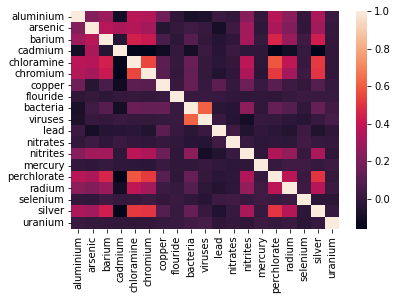

In [6]:
sns.heatmap(df.corr());

# 2. Preparar os dados

De posse dos resultados da etapa anterior:

- Existem valores nulos? Quantos? Dá para tratar?
  - Dica: Olhar os tipos de dados de ammonia e is_safe. Tomar cuidado com a string #NUM!
  - Outra dica: Buscar esses valores (#NUM!) e remover as linhas. Depois transformar ammonia para float e is_safe para int (usando astype).
- É necessário aplicar técnicas de transformação de dados como transformar variável qualitativa em quantitativa, normalizar os dados, aplicar one-hot enconding?

Caso necessário aplique os tratamentos.

**existes valores que são considerados como 'nulos' nas variaveis 'anmonia' e 'is_safe', vamos remover essas linhas com esse valores**

In [7]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
df.max()

aluminium       5.05
ammonia         9.99
arsenic         1.05
barium          4.94
cadmium         0.13
chloramine      8.68
chromium         0.9
copper           2.0
flouride         1.5
bacteria         1.0
viruses          1.0
lead             0.2
nitrates       19.83
nitrites        2.93
mercury         0.01
perchlorate    60.01
radium          7.99
selenium         0.1
silver           0.5
uranium         0.09
is_safe            1
dtype: object

In [9]:
df.min()

aluminium        0.0
ammonia        #NUM!
arsenic          0.0
barium           0.0
cadmium          0.0
chloramine       0.0
chromium         0.0
copper           0.0
flouride         0.0
bacteria         0.0
viruses          0.0
lead             0.0
nitrates         0.0
nitrites         0.0
mercury          0.0
perchlorate      0.0
radium           0.0
selenium         0.0
silver           0.0
uranium          0.0
is_safe        #NUM!
dtype: object

In [10]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [11]:
df[df['is_safe'].str.contains('#NUM!')]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [12]:
df[df['ammonia'].str.contains('#NUM!')]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


**como são poucas linhas vamos remover selecionando as linhas 7551, 7568 e 7890**

In [13]:
df = df.drop([7551, 7568, 7890], axis=0)

**transformar ammonia em float e is_safe em int**

In [15]:
df.is_safe = df.is_safe.astype('int64')
df.ammonia = df.ammonia.astype('float64')
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

**anmonia negativo? remover essas linhas tambem**

In [16]:
df.min()

aluminium      0.00
ammonia       -0.08
arsenic        0.00
barium         0.00
cadmium        0.00
chloramine     0.00
chromium       0.00
copper         0.00
flouride       0.00
bacteria       0.00
viruses        0.00
lead           0.00
nitrates       0.00
nitrites       0.00
mercury        0.00
perchlorate    0.00
radium         0.00
selenium       0.00
silver         0.00
uranium        0.00
is_safe        0.00
dtype: float64

In [17]:
df_mask = df['ammonia'] < 0.0
filtered_df = df[df_mask]
filtered_df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
1503,2.82,-0.01,0.47,1.55,0.11,5.79,0.54,1.95,0.56,0.00,...,0.006,16.73,2.04,0.009,29.20,4.31,0.01,0.06,0.01,1
1552,1.60,-0.07,0.95,1.36,0.04,0.40,0.85,0.58,0.34,0.00,...,0.183,5.02,1.42,0.007,6.99,6.53,0.07,0.27,0.05,0
1569,1.92,-0.03,0.66,3.96,0.08,6.19,0.37,1.11,0.61,0.00,...,0.178,12.43,2.05,0.008,6.65,3.83,0.06,0.33,0.07,0
1698,2.99,-0.08,0.41,4.65,0.12,3.55,0.30,1.79,1.31,0.78,...,0.065,15.54,1.93,0.003,11.15,2.89,0.05,0.40,0.09,0
1891,2.59,-0.01,1.01,3.57,0.11,1.34,0.26,1.80,0.72,0.57,...,0.088,10.09,1.59,0.009,36.75,7.70,0.03,0.34,0.02,0
3503,0.04,-0.01,0.33,1.63,0.09,5.57,0.54,0.05,0.56,0.94,...,0.001,15.95,2.19,0.009,29.09,4.31,0.01,0.06,0.01,1
3552,0.10,-0.07,0.62,1.59,0.11,0.26,0.85,0.01,0.34,0.53,...,0.001,5.02,1.34,0.007,6.89,6.53,0.07,0.27,0.05,0
3569,0.19,-0.03,0.09,3.94,0.05,6.26,0.37,0.02,0.61,0.73,...,0.001,12.94,2.09,0.008,6.88,3.83,0.06,0.33,0.07,0
3698,0.01,-0.08,0.20,4.53,0.09,3.17,0.30,0.08,1.31,0.78,...,0.001,16.00,1.61,0.003,11.26,2.89,0.05,0.40,0.09,0
3891,0.11,-0.01,0.62,3.80,0.10,1.38,0.26,0.05,0.72,0.57,...,0.088,10.26,1.53,0.009,36.78,7.70,0.03,0.34,0.02,0


**novamente poucas linhas, vamos remover "manualmente"**

In [18]:
df = df.drop([1503, 1552, 1569, 1698, 1891, 3503, 3552, 3569, 3698, 3891], axis=0)

In [19]:
df.min()

aluminium      0.0
ammonia        0.0
arsenic        0.0
barium         0.0
cadmium        0.0
chloramine     0.0
chromium       0.0
copper         0.0
flouride       0.0
bacteria       0.0
viruses        0.0
lead           0.0
nitrates       0.0
nitrites       0.0
mercury        0.0
perchlorate    0.0
radium         0.0
selenium       0.0
silver         0.0
uranium        0.0
is_safe        0.0
dtype: float64

**É necessário aplicar técnicas de transformação de dados como transformar variável qualitativa em quantitativa, normalizar os dados, aplicar one-hot enconding?**

Apenas transformamos as variaveis 'ammonia' e 'is_safe' em float e int

**Correlação após os tratamentos dos dados**

In [20]:
df.corr

<bound method DataFrame.corr of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates 

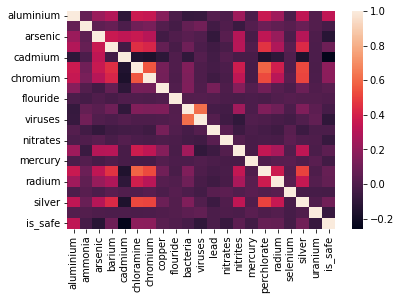

In [21]:
sns.heatmap(df.corr());

temos uma maior correlação com o is_safe no aluminium, chloramine e chromium

# 3. Modelagem

Aqui iremos desenvolver alguns modelos e compará-los quanto as métricas de avaliação.

Para tanto:
1. Construa a matriz X com as features e o vetor y com o alvo. Dica: usar drop (com axis=1) da coluna alvo sem alterar o dataframe e selecionar o alvo depois.
2. Separe X e y em dois conjuntos: X_treino, X_teste, y_treino e y_teste, com 20% dos dados para teste e 80 % para treino usando a semente (random_state) com o valor 42. Os conjuntos de teste iremos usar somente na etapa de avaliação do modelo final.

In [22]:
X = df.drop(['is_safe'], axis=1)
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [23]:
y = df.is_safe
y

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7986, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [25]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((6388, 20), (1598, 20), (6388,), (1598,))

## 3.1 Modelo usando K vizinhos mais próximo

Ache o modelo de k vizinhos com a melhor **acurácia** usando validação cruzada (cross-validatidion). (Aula 11)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parametros = {'n_neighbors': [i for i in range(1, 50)]}
busca = GridSearchCV(KNeighborsClassifier(), parametros, scoring='accuracy')
busca.fit(X_treino, y_treino)
print('Melhor estimador (modelo)')
busca.best_estimator_

Melhor estimador (modelo)


KNeighborsClassifier(n_neighbors=22)

Após ter o modelo com o melhor número de vizinhos, treine o modelo usando o melhor número de vizinhos encontrado.

In [27]:
from sklearn.metrics import accuracy_score
y_pred = busca.predict(X_teste)
round(accuracy_score(y_teste, y_pred), 2)

0.88

Com esse modelo de k vizinhos final o avalie com matriz de confusão, recall e precisão. Use os dados de teste para isso.

Onde o modelo está errando? (falso positivo, negativo, etc?)

Nesse problema onde seria melhor errar? Em outras palavras, qual métrica poderia ser mais adequada nesse problema?

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_pred)
cm

array([[1414,    2],
       [ 182,    0]])

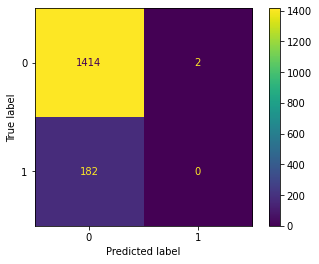

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot();

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1416
           1       0.00      0.00      0.00       182

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.79      0.88      0.83      1598



**Onde o modelo está errando? (falso positivo, negativo, etc?)**

o modelo está errando 100% no falso negativo e todos os valores que ele previu positivo errou tambem.

**Nesse problema onde seria melhor errar? Em outras palavras, qual métrica poderia ser mais adequada nesse problema?**

nessa caso é melhor errar no falso negativo mas não nessa propoção do modelo KNN, e diminuir ao maximo os falsos positivos.

## 3.2 Modelo usando árvores de decisão

Aplique o modelo de árvore de decisão da aula 11 (pode-se buscar os melhores hiperparâmetros, mas nesse caso faça um modelo só com o padrão).

In [31]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=0)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=0)

Avalie o modelo usando a matriz de confusão, recall e precisão. Use os dados de teste para isso.

Onde o modelo está errando? (falso positivo, negativo, etc?)

Está melhor ou pior que o modelo final de k vizinhos do ponto de vista do problema?

In [32]:
y_pred = modelo.predict(X_teste)
accuracy_score(y_teste, y_pred)

0.958072590738423

In [33]:
from sklearn.metrics import precision_score
precision_score(y_teste, y_pred)

0.8362573099415205

In [34]:
from sklearn.metrics import recall_score
recall_score(y_teste, y_pred)

0.7857142857142857

In [35]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_teste, y_pred)
cm2

array([[1388,   28],
       [  39,  143]])

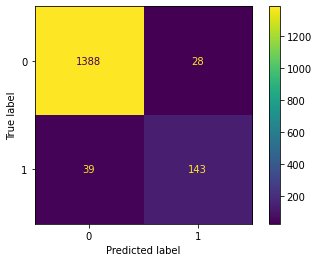

In [36]:
ConfusionMatrixDisplay(cm2).plot();

**Onde o modelo está errando? (falso positivo, negativo, etc?)**

o modelo está errando mais nos falso negativos (proporcionalmente), mas tambem está errando nos falsos positivos (algo que não é legal pra essa situação) podemos aplicar algumas técnicas para diminuir os falsos positivos

**Está melhor ou pior que o modelo final de k vizinhos do ponto de vista do problema?**

este modelo esta melhor que o modelo final de k vizinhos

**Observação**: Não será solicitado para a AC, mas verifique a árvore gerada e a importância das features da árvore. A explicabilidade do modelo é uma das principais vantagens de métodos baseados em árvores.

## 3.3 Escolha do modelo

Agora vamos escolher o modelo final, aquele que tem a melhor métrica para o problema. Analisando acurácia, recall e cobertura escolha entre os k vizinhos com melhor avaliação e a árvore de decisão. Qual dos dois modelos é o escolhido e por quê?

- Obs.: É comum só usarmos os dados de teste somente agora, para dar o report final do modelo. Se forem usados somente agora, teria que ter mais um conjunto (de validação) para a avaliação de cada modelo separadamente.

**MODELO KNN**

ele basicamente falou que todos as amostras são impróprias para o uso (resultando em 182 falso negativos porque tem 182 amostras boas para o uso), apenas duas amostras ele predisse que são boas ao uso e ainda por cima errou essas duas (falso positivo), por conta disso a precisão e o recall estão em 0 (algo que é muito ruim), a acuracia esta alta porque a maior parte das amostras são impróprias e o modelo previu que todas são impróprias

**ÁRVORE DE DECISÃO**

apesar do modelo de árvore de decisão ter bastante falsos positivo (algo que é bem ruim pra essa situação) se saiu bem melhor do que o modelo de KNN. Podemos aplicar técnicas para diminuir o falso positivo do modelo de arvore de decisão isso aumentaria os falsos negativos mas acredito que valeria a pena, a matriz de confusão, acuracia, precisão e recall estão bem melhores e mais equilibradas do que no modelo KNN

**MODELO ESCOLHIDO**

Árvore de decisão